In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import os

# os.listdir('drive/MyDrive')

#Lectura de Tablas

Para poder trabajar con las tablas utilizando Pandas tenemos que transformar las tablas en objetos dentro de nuestro entorno de Python de la clase [`pd.DataFrame`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html).

DataFrame es una clase de Python, por lo que se pueden crear DataFrames utilizando el constructor `pd.DataFrame([...])`. La ventaja de utilizar DataFrames de Pandas es que tienen múltiples funciones y atributos integrados que facilitan trabajar con tablas automatizando operaciones de forma flexible.

Pandas ofrece funciones para poder leer datos directamente de archivos y así ahorrarnos la construcción y el relleno de DataFrames vacíos.

## Lectura de datos a partir de un archivo xlsx (excel)

Uno de los archivos con datos en tablas de uso más extendido son las hojas de cálculo. Éstas tienen un formato especial que permite guardar múltiples tablas en hojas separadas.

Pandas tiene un función específica para leer éstas tablas: [`pd.read_excel("{ruta al archivo}", [parámetros opcionales])`](https://pandas.pydata.org/docs/reference/api/pandas.read_excel.html)

Los parámetros opcionales que serán de ayuda más comúnmente son:
  
*   `sheet_name`: El nombre o índice de la hoja de la que vamos a leer.
*   `header`: Indica la fila que da nombre a cada columna. Podemos introducir el nombre de la fila o el índice. Por defecto se utiliza la primera fila, con el índice 0. Si pasamos una lista se crearán columnas por niveles y si pasamos el valor `None` se crean columnas numeradas automáticamente.
*   `index_col`: Indica la(s) columna(s) que contiene(n) el identificador de cada fila. Tiene un comportamiénto similar a header, usando por defecto el índice 0, creando multi índices al pasar una lista y creandu un índice automático al recibir `None`.
*   `usecols`: Si se utiliza, indica las columnas que se van a leer de la hoja. Se pueden indicar las columnas con una lista de índices, nombres de la columna o una cadena con índices de excel 'A, B, ..., Z, AA, ..., ZZ, ...'. Además es posible utilizar segmentos de python [0:1], ['A':'Z'], ['columna_0':'columna_N']
*   `nrows`: Indica cuántas filas leer. Por defecto lee todas las filas en las que el excel tiene datos.
*   `skiprows`: Indica qué o cuantas filas saltarse desde la primera.


In [55]:
"""
  El archivo vehículos.xlsx tiene dos hojas, en la primera contiene dos tablas distintas de coches y en la segunda una tabla de motos.
  Abriendo el archivo podemos vér en que parte de cada hoja está cada tabla para poder leerlo correctamente.
"""

df_coches_1 = pd.read_excel("drive/MyDrive/Python_Pandas_course/data/vehículos.xlsx", sheet_name="Hoja 1", header=0, index_col='Marca', usecols='A:D', nrows=10) #La primera tabla ocupa las columnas desde la A hasta la D(incluída). El encabezado está en la fila 1 y se puede usar la columna 'Marca' como índice.
df_coches_2 = pd.read_excel("drive/MyDrive/Python_Pandas_course/data/vehículos.xlsx", sheet_name="Hoja 1", header=0, index_col=0, usecols='E:H', nrows=10, skiprows=13) #La segunda tabla empieza en la fila 14 y ocupa las columnas desde la E hasta la J(incluída). El encabezado está en la fila 1 y se puede usar la columna 'Marca' como índice al igual que el otro.
df_motos = pd.read_excel("drive/MyDrive/Python_Pandas_course/data/vehículos.xlsx", sheet_name="Hoja 2") #La tercera tabla es la única en la hoja dos, por tanto la función la leerá bien por sí sola.
df_motos

,Marca,Año de creación,País de creación,Ventas anuales (millones),Tipo de motos
0,Harley-Davidson,1903,Estados Unidos,0.20,Cruiser / Touring
1,Ducati,1926,Italia,0.08,Deportivas / Naked
2,Royal Enfield,1901,India,0.70,Clásicas / Retro
3,KTM,1934,Austria,0.30,Off-road / Enduro
4,Husqvarna,1903,Suecia,0.05,Enduro / Supermoto
5,MV Agusta,1945,Italia,0.03,Superdeportivas
6,Bajaj Auto,1945,India,3.20,Urbanas / Commuter
7,TVS Motor,1978,India,3.10,Commuter / Scooter
8,Benelli,1911,Italia,0.06,Naked / Deportivas
9,Hero MotoCorp,1984,India,4.50,Commuter / Económicas


## Lectura de archivos de Valores Separados (CSV, TSV, etc.)

La forma más intuitiva y flexible de guardar datos en tablas es con la familia de valores separados (CSV, TSV, ...). Estos archivos se caracterizan por guardar las tablas con sus columnas separadas por una cadena (comas, puntos, espacios, tabuladores, otros) a la que se llama separador.

Pandas tiene una función para leer tablas de valores separados y transformarlos diráctamente a DataFrames: [`pd.read_table("{ruta al archivo}", [parámetros opcionales])`](
https://pandas.pydata.org/docs/reference/api/pandas.read_table.html)

Los parámetros opcionales que serán de ayuda más comúnmente son:
  
*   `sep`o `delimiter`: Indica cuál es el separador. Cuando se introduce `None`, Pandas encuentra el separador automáticamente, pero se pueden introducir cadenas y expresiones regulares para casos excepcionales. Por defecto es el tabulador '\t'.
*   `header`: Indica la fila que da nombre a cada columna. Podemos introducir el nombre de la fila o el índice. Por defecto se utiliza la primera fila, con el índice 0. Si pasamos una lista se crearán columnas por niveles y si pasamos el valor `None` se crean columnas numeradas automáticamente.
*   `index_col`: Indica la(s) columna(s) que contiene(n) el identificador de cada fila. Tiene un comportamiénto similar a header, usando por defecto el índice 0, creando multi índices al pasar una lista y creandu un índice automático al recibir `None`.
*   `usecols`: Si se utiliza, indica las columnas que se van a leer de la hoja. Se pueden indicar las columnas con una lista de índices o nombres de la columna.
*   `nrows`: Indica cuántas filas leer. Por defecto lee todas las filas en las que el excel tiene datos.
*   `skiprows`: Indica qué o cuantas filas saltarse desde la primera.


In [56]:
"""
  El archivo tablas.txt tiene dos tablas distintas de datos, una después de la otra. Ambas tablas utilizan separadores distintos y tienen un número distinto de columnas.
  Abriendo el archivo podemos ver cuándo.
"""
df_pintores = pd.read_table("drive/MyDrive/Python_Pandas_course/data/tablas.txt", sep='y', header=0, index_col=0, nrows=10) # Las 11 primeras líneas son la Tabla de Pintores y Cuadro más Famoso, que está separada por 'y' y tiene 10 filas de datos.
df_tiempo = pd.read_table("drive/MyDrive/Python_Pandas_course/data/tablas.txt", sep=',', header=0, index_col=0, skiprows=11) # Las líneas a partir de la 12 son la Tabla de es Tiempo, que está separada por ',' y tiene 12 filas de datos.
df_tiempo

,Ciudad,Temperatura Mínima,Temperatura Máxima,Precipitaciones
Fecha,,,,
2025-05-01,Madrid,12,25,Sol
2025-05-01,Berlín,8,18,Nubes
2025-05-01,París,10,20,Lluvia
2025-05-01,Oslo,2,9,Nieve
2025-05-01,Tokio,14,23,Sol
2025-05-01,Londres,9,17,Lluvia
2025-05-01,Nueva York,11,21,Nubes
2025-05-01,Sydney,16,26,Sol
2025-05-01,Moscú,3,11,Nieve


## Lectura de datos a partir del portapapeles
En ocasiones los datos con los que se quiere trabajar están en un documento pdf, una página web o otros documentos que nos dificultan extraer los datos en un archivo independiente para ser leído con Pandas.

Gracias a la función [`pd.read_clipboard`](https://pandas.pydata.org/docs/reference/api/pandas.read_clipboard.html), podemos utilizar el cursor para copiar las tablas al portapapeles (Crtl+C o Click Derecho -> Copiar) y que pandas las lea

In [23]:
"""
Estos links contienen datos en tablas a los que es más facil acceder copiando en el portapapeles.
De igual forma que se puede copiar y pegar, se puede copiar y ejecutar pd.read_clipboard() para crear un dataframe con esos datos.
# https://www.unileon.es/estudiantes/oferta-academica/grados
# https://www.wikidex.net/wiki/Lista_de_Pok%C3%A9mon
"""
# La función pd.read_clipboard no funciona en entornos de ejecución remota como kaggle o google colab. Sólo funciona en scripts, cuadernos o terminales locales.
# The pd.read_clipboard function doesn't work in remote execution environments like Kaggle or Google Colab. It only works in local scripts, notebooks, or terminals.
data = pd.read_clipboard()

PyperclipException: 
    Pyperclip could not find a copy/paste mechanism for your system.
    For more information, please visit
    https://pyperclip.readthedocs.io/en/latest/index.html#not-implemented-error
    

# Manejo de datos de las tablas
Una vez sabemos cómo transformar tablas de datos en DataFrames, podemos empezar a utilizarlos para operar. Las funciones y atributos de DataFrames nos permiten acceder y modificar valores de las celdas de las tablas, añadir y borrar filas columnas, crear filtros e incluso fusionar tablas distintas.

Estas operaciones las llevaremos a cabo con los atributos y funciones:
* [`pd.DataFrame.loc`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.loc.html)
* [`pd.DataFrame.iloc`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.iloc.html)
* [`pd.DataFrame.where`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.where.html)
* [`pd.DataFrame.drop`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html)

## Leer valores de las celdas de una tabla
Para leer los datos de las celdas de un DataFrame podemos indexar el propio DataFrame o bien los atributos `pd.DataFrame.loc` o `pd.DataFrame.iloc`.

In [50]:
print(df_motos['Marca']) # Indexar de ésta manera nos devuelve otro DataFrame con las mismas filas que el original, o un Series, que es similar al DataFrame pero actúa más parecido a una lista normal.

print(df_motos.loc[1:7, 'Marca']) # Indexar loc e iloc nos devuelve otro DataFrame nos devuelven las celdas de las filas y columnas indicadas en forma de DataFrame.
print(df_motos.iloc[-1, 0]) # Cuando utilizamos iloc debemos indicar los índices de las columnas en lugar de su nombre

0    Harley-Davidson
1             Ducati
2      Royal Enfield
3                KTM
4          Husqvarna
5          MV Agusta
6         Bajaj Auto
7          TVS Motor
8            Benelli
9      Hero MotoCorp
Name: Marca, dtype: object
1           Ducati
2    Royal Enfield
3              KTM
4        Husqvarna
5        MV Agusta
6       Bajaj Auto
7        TVS Motor
Name: Marca, dtype: object
Hero MotoCorp


## Filtrar una tabla
Podemos introducir vectores de valores booleanos para filtrar los datos leídos o modificados de una tabla.

### DataFrames de Booleanos
Podemos crear Datarames de booleanos para crear filtros con operaciones booleanas con DataFrames.

In [38]:
df_motos == 1945

,Marca,Año de creación,País de creación,Ventas anuales (millones),Tipo de motos
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
5,False,True,False,False,False
6,False,True,False,False,False
7,False,False,False,False,False
8,False,False,False,False,False
9,False,False,False,False,False


In [39]:
df_motos['Marca'] == 'Kawasaki'

,Marca
0,False
1,False
2,False
3,False
4,False
5,False
6,False
7,False
8,False
9,False


### Filtros en índices
Filtrar indexando con valores booleanos nos dará DataFrames más pequeños que cumplirán los filtros aplicados.

In [40]:
df_motos[df_motos['Año de creación'] > 1950] #Introducir booleanos en el indexador de DataFrame filtra las filas, pero no permite filtrar las columnas
df_motos.loc[df_motos['Año de creación'] > 1950, 'Marca'] #Utilizando loc, podemos filtrar las filas a la vez que seleccionamos las columnas mostradas
# Como iloc solo toma números de índice, intentar filtrar el DataFrame utilizándolo dará errores.

,Marca
7,TVS Motor
9,Hero MotoCorp


### Filtro where
La función [`pd.DataFrame.where`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.where.html) toma como input un DataFrame o un array de booleans.

Parámetros:
* `condition`: Es el filtro que se introducirá
* `other`[opcional, default=nan]: Es el valor por el que se sustituirán las celdas que no cumplan la condición
* `inplace`[opcional, default=False]: Si es True se modificará el DataFrame, si no, se devolverá una copia del DataFrame original modificada.

In [41]:
df_motos.where(df_motos == 1945, other="NOT1945") #Los DataFrames introducidos deben tener las mismas dimensiones que el DataFrame en los ejes sobre los que opere.

,Marca,Año de creación,País de creación,Ventas anuales (millones),Tipo de motos
0,NOT1945,NOT1945,NOT1945,NOT1945,NOT1945
1,NOT1945,NOT1945,NOT1945,NOT1945,NOT1945
2,NOT1945,NOT1945,NOT1945,NOT1945,NOT1945
3,NOT1945,NOT1945,NOT1945,NOT1945,NOT1945
4,NOT1945,NOT1945,NOT1945,NOT1945,NOT1945
5,NOT1945,1945,NOT1945,NOT1945,NOT1945
6,NOT1945,1945,NOT1945,NOT1945,NOT1945
7,NOT1945,NOT1945,NOT1945,NOT1945,NOT1945
8,NOT1945,NOT1945,NOT1945,NOT1945,NOT1945
9,NOT1945,NOT1945,NOT1945,NOT1945,NOT1945


## Escribir y asignar valores a una Tabla
Además de poder modificar datos utilizando las operaciones de lectura y los filtros, pandas permite crear nuevas filas y columnas.

In [42]:
#Hacemos una copia para hacer las modificaciones
df_motos_copy = df_motos.copy()


### Modificar celdas filtradas

In [43]:
df_motos_copy["Marca"] = "Otro valor" # Introducir un valor único modifica todas las filas del DataFrame.
print(df_motos_copy) # Cuando modificamos una columna del DataFrame, tenemos que introducir listas de longitud igual al número de filas del DataFrame, para mantener la integridad.

        Marca  Año de creación País de creación  Ventas anuales (millones)  \
0  Otro valor             1903   Estados Unidos                       0.20   
1  Otro valor             1926           Italia                       0.08   
2  Otro valor             1901            India                       0.70   
3  Otro valor             1934          Austria                       0.30   
4  Otro valor             1903           Suecia                       0.05   
5  Otro valor             1945           Italia                       0.03   
6  Otro valor             1945            India                       3.20   
7  Otro valor             1978            India                       3.10   
8  Otro valor             1911           Italia                       0.06   
9  Otro valor             1984            India                       4.50   

           Tipo de motos  
0      Cruiser / Touring  
1     Deportivas / Naked  
2       Clásicas / Retro  
3      Off-road / Enduro  
4     

In [44]:
df_motos_copy.loc[df_motos_copy["Año de creación"]>=1945, "Marca"] = "Mayor que 1945" # Modifica todas las filas que cumplan el filtro
print(df_motos_copy)

            Marca  Año de creación País de creación  \
0      Otro valor             1903   Estados Unidos   
1      Otro valor             1926           Italia   
2      Otro valor             1901            India   
3      Otro valor             1934          Austria   
4      Otro valor             1903           Suecia   
5  Mayor que 1945             1945           Italia   
6  Mayor que 1945             1945            India   
7  Mayor que 1945             1978            India   
8      Otro valor             1911           Italia   
9  Mayor que 1945             1984            India   

   Ventas anuales (millones)          Tipo de motos  
0                       0.20      Cruiser / Touring  
1                       0.08     Deportivas / Naked  
2                       0.70       Clásicas / Retro  
3                       0.30      Off-road / Enduro  
4                       0.05     Enduro / Supermoto  
5                       0.03        Superdeportivas  
6               

## Añadir filas y columnas nuevas


In [45]:
df_motos_copy["Nueva columna"] = "nuevo valor" # Cuando asignamos un valor a una nueva columna, todas las filas tendrán ese valor para esa columna
df_motos_copy["Nueva columna 2"] = df_motos_copy["Nueva columna"] # Una alternativa es añadir una lista con tantas posiciones como filas tiene el dataframe. En este ejemplo copiamos los valores de Nueva Columna en Nueva Columna 2
df_motos_copy

,Marca,Año de creación,País de creación,Ventas anuales (millones),Tipo de motos,Nueva columna,Nueva columna 2
0,Otro valor,1903,Estados Unidos,0.20,Cruiser / Touring,nuevo valor,nuevo valor
1,Otro valor,1926,Italia,0.08,Deportivas / Naked,nuevo valor,nuevo valor
2,Otro valor,1901,India,0.70,Clásicas / Retro,nuevo valor,nuevo valor
3,Otro valor,1934,Austria,0.30,Off-road / Enduro,nuevo valor,nuevo valor
4,Otro valor,1903,Suecia,0.05,Enduro / Supermoto,nuevo valor,nuevo valor
5,Mayor que 1945,1945,Italia,0.03,Superdeportivas,nuevo valor,nuevo valor
6,Mayor que 1945,1945,India,3.20,Urbanas / Commuter,nuevo valor,nuevo valor
7,Mayor que 1945,1978,India,3.10,Commuter / Scooter,nuevo valor,nuevo valor
8,Otro valor,1911,Italia,0.06,Naked / Deportivas,nuevo valor,nuevo valor
9,Mayor que 1945,1984,India,4.50,Commuter / Económicas,nuevo valor,nuevo valor


In [46]:
df_motos_copy.loc[10] = ["Marca Nueva", 2025, "España", 0.0, "Nuevo Tipo", "nuevo valor", "nuevo valor 2"] # Cuando introducimos una nueva fila debemos especificar todos los valores
df_motos_copy

,Marca,Año de creación,País de creación,Ventas anuales (millones),Tipo de motos,Nueva columna,Nueva columna 2
0,Otro valor,1903,Estados Unidos,0.20,Cruiser / Touring,nuevo valor,nuevo valor
1,Otro valor,1926,Italia,0.08,Deportivas / Naked,nuevo valor,nuevo valor
2,Otro valor,1901,India,0.70,Clásicas / Retro,nuevo valor,nuevo valor
3,Otro valor,1934,Austria,0.30,Off-road / Enduro,nuevo valor,nuevo valor
4,Otro valor,1903,Suecia,0.05,Enduro / Supermoto,nuevo valor,nuevo valor
5,Mayor que 1945,1945,Italia,0.03,Superdeportivas,nuevo valor,nuevo valor
6,Mayor que 1945,1945,India,3.20,Urbanas / Commuter,nuevo valor,nuevo valor
7,Mayor que 1945,1978,India,3.10,Commuter / Scooter,nuevo valor,nuevo valor
8,Otro valor,1911,Italia,0.06,Naked / Deportivas,nuevo valor,nuevo valor
9,Mayor que 1945,1984,India,4.50,Commuter / Económicas,nuevo valor,nuevo valor


## Eliminar Filas y Columnas de la Tabla

De la fisma forma que se pueden añadir filas y columnas con DataFrame, se pueden eliminar ayudándonos de filtros y criterios de selección.

In [47]:
df_motos_copy = df_motos.copy()
print(df_motos_copy.drop(0)) # Podemos eliminar una fila especificando el índice de la que queremos eliminar (por ejemplo, la fila con índice 0)
print(df_motos_copy.drop(columns="Tipo de motos")) # Utilizando el parámetro columns podemos especificar los nombres de las columnas que queramos eliminar

           Marca  Año de creación País de creación  Ventas anuales (millones)  \
1         Ducati             1926           Italia                       0.08   
2  Royal Enfield             1901            India                       0.70   
3            KTM             1934          Austria                       0.30   
4      Husqvarna             1903           Suecia                       0.05   
5      MV Agusta             1945           Italia                       0.03   
6     Bajaj Auto             1945            India                       3.20   
7      TVS Motor             1978            India                       3.10   
8        Benelli             1911           Italia                       0.06   
9  Hero MotoCorp             1984            India                       4.50   

           Tipo de motos  
1     Deportivas / Naked  
2       Clásicas / Retro  
3      Off-road / Enduro  
4     Enduro / Supermoto  
5        Superdeportivas  
6     Urbanas / Commuter  


## Juntar tablas
Utilizando pandas, podemos juntar automáticamente dos tablas utilizando la función [`pd.concat`](https://pandas.pydata.org/docs/reference/api/pandas.concat.html)

Parámetros sencillos de concat:
* `objs`: Es una lista con todas las tablas que se van a concatenar
* `axis`[0/'index', 1/'columns']: Indica el eje en el que se van a concatenar. Si es 0 las filas de las tablas se juntarán en la labla resultado. Si es 1 la tabla resultante las columnas de las todas las tablas. Para simplificar, si queremos concatenar por filas las tablas tienen que tener las mismas columnas, y si queremos concatenar por columnas tiene que haber el mismo número de filas.

In [48]:
df_coches = pd.concat([df_coches_1, df_coches_2], axis=0)
df_coches

,Año de creación,País de creación,Ventas anuales (millones)
Marca,,,
Toyota,1937,Japón,10.5
Ford,1903,Estados Unidos,4.2
BMW,1916,Alemania,2.5
Honda,1948,Japón,5.1
Chevrolet,1911,Estados Unidos,3.8
Mercedes-Benz,1926,Alemania,2.4
Volkswagen,1937,Alemania,9.3
Audi,1910,Alemania,1.7
Hyundai,1967,Corea del Sur,4.5


## Ejercicio: Juntando Tablas en Formatos distintos

Una empresa de análisis de mercado está realizando un estudio sobre el mercado automotriz. Han recopilado datos de diferentes fuentes, incluyendo información sobre coches y motos. Estos datos se almacenan en tres tablas distintas:

df_coches_1: Contiene información sobre algunos modelos de coches, como la marca, el modelo, el año de lanzamiento y el precio.
df_coches_2: Contiene información adicional sobre otros modelos de coches, como la potencia, el consumo de combustible y el tipo de motor.
df_motos: Contiene información sobre diferentes modelos de motos, como la marca, el modelo, el tipo de moto y el año de creación.
El objetivo es realizar un análisis conjunto del mercado de coches y motos. Para ello, es necesario juntar las tres tablas en una sola, de manera que se pueda tener una visión completa de todos los vehículos.

---

Crea una nueva tabla llamada df_vehiculos que contenga la información de las tres tablas df_coches_1, df_coches_2 y df_motos. Asegúrate de que la tabla resultante tenga las siguientes columnas:

* marca
* modelo
* tipo_vehiculo [coche o moto]
* año

In [49]:
"""
  Escribe el código necesario para crear la tabla df_vehiculos siguiendo los pasos del enunciado.
"""
df_vehiculos = None

# Exportar Tablas
Tras aprender a manejar los datos de las tablas, lo último que queda es poder exportar esos datos.

[`df.to_csv('data.csv', index=False)`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_csv.html) transforma la tabla en un csv.

[`df.to_excel('data.xlsx', sheet_name='Sheet1', index=False)`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_excel.html) transforma la tabla en un excel guardado en la hoja indicada en `sheet_name`.

[`df.to_latex(file=None, index=False)`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_latex.html) transforma la tabla en una cadena de texto en formato latex. Si `file` no es `None`, se guardará la cadena en `file`. Es útil para incorporar la tabla directamente a un documento latex, pudiendo agregarse com un archivo importado.

[`html_table = df.to_html(index=False)`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_html.html) transforma la tabla en una cadena de texto en formato de tabla html. Es la opción que mejor guarda los estilos de la tabla, que veremos más tarde, y permite incorporar la tabla directamente en una página web.


Todas estas funciones tienen algunos parámetros comunes, como:

* `index`: Si se establece en False, no se incluirá el índice del DataFrame en el archivo de salida.
* `header`: Si se establece en False, no se incluirá el encabezado del DataFrame en el archivo de salida.
* `encoding`: La codificación de caracteres que se utilizará para el archivo de salida.

# Visualización de Datos
Utilizar DataFrames tiene ventajas más allá de la mera gestión de los datos en tablas. Pandas tiene funciones propias que permiten la visualización de los datos con funciones simples que aportan gráficas útiles.

En esta sección trabajamos con el dataset [pokemon.csv](https://www.kaggle.com/datasets/rounakbanik/pokemon), que contiene datos de más de 800 pokemons que utilizaremos para mostrar las capacidades de visualización de datos que ofrece Pandas.

In [6]:
df_pokemon = pd.read_table("drive/MyDrive/Python_Pandas_course/data/pokemon.csv", sep=',', index_col = 'pokedex_number')

## Tablas con estilos

El atributo [`pd.DataFrame.style`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.style.html) permite estilizar las tablas con colores y formatos tanto de las celdas como del texto que nos dejan visualizar mejor los datos. Es un objeto de la clase [`pandas.io.formats.style.Styler`](https://pandas.pydata.org/docs/reference/api/pandas.io.formats.style.Styler.html) que abreviaremos como `Style`

Para visualizar la tabla, utilizaremos los nueve primeros pokemon del dataset con una selección de columnas más pequeña.

In [7]:
df_iniciales = df_pokemon.loc[:9, ['name', 'abilities', 'classfication', 'type1', 'type2', 'height_m', 'weight_kg', 'hp', 'attack','defense','sp_attack', 'sp_defense', 'speed']]

### Modificar directamente style
En este código se utiliza el módulo de estilo de Pandas para personalizar la apariencia del DataFrame `df_initials1`.
Este módulo no altera los datos, sino que cambia cómo se visualizan al renderizarse, por ejemplo, en un entorno de Jupyter Notebook.

- [`df.style`](https://pandas.pydata.org/pandas-docs/stable/user_guide/style.html): Activa las herramientas de estilo en el DataFrame.
- [`set_properties()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.io.formats.style.Styler.set_properties.html):
  Método para definir propiedades CSS que personalizan la apariencia de las celdas del DataFrame. Entre las propiedades
  más utilizadas están:
    - `background-color`: Define el color de fondo de las celdas.
    - `color`: Configura el color del texto.
    - `border-color`: Cambia el color de los bordes de las celdas.
- [`set_caption()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.io.formats.style.Styler.set_caption.html):
  Añade un título o descripción al DataFrame. Este título aparece sobre la tabla cuando se visualiza.

In [8]:
df_iniciales.style.set_properties(**{
        'background-color': 'black',
        'color': 'white',
        'border-color': 'gray'
    }).set_caption("Tabla de pokemon iniciales")



,name,abilities,classfication,type1,type2,height_m,weight_kg,hp,attack,defense,sp_attack,sp_defense,speed
pokedex_number,,,,,,,,,,,,,
1,Bulbasaur,"['Overgrow', 'Chlorophyll']",Seed Pokémon,grass,poison,0.700000,6.900000,45,49,49,65,65,45
2,Ivysaur,"['Overgrow', 'Chlorophyll']",Seed Pokémon,grass,poison,1.000000,13.000000,60,62,63,80,80,60
3,Venusaur,"['Overgrow', 'Chlorophyll']",Seed Pokémon,grass,poison,2.000000,100.000000,80,100,123,122,120,80
4,Charmander,"['Blaze', 'Solar Power']",Lizard Pokémon,fire,nan,0.600000,8.500000,39,52,43,60,50,65
5,Charmeleon,"['Blaze', 'Solar Power']",Flame Pokémon,fire,nan,1.100000,19.000000,58,64,58,80,65,80
6,Charizard,"['Blaze', 'Solar Power']",Flame Pokémon,fire,flying,1.700000,90.500000,78,104,78,159,115,100
7,Squirtle,"['Torrent', 'Rain Dish']",Tiny Turtle Pokémon,water,nan,0.500000,9.000000,44,48,65,50,64,43
8,Wartortle,"['Torrent', 'Rain Dish']",Turtle Pokémon,water,nan,1.000000,22.500000,59,63,80,65,80,58
9,Blastoise,"['Torrent', 'Rain Dish']",Shellfish Pokémon,water,nan,1.600000,85.500000,79,103,120,135,115,78


En este código se define una función para aplicar estilos personalizados a un DataFrame (`df`). El objetivo es alternar el estilo de las filas para mejorar la legibilidad visual.
1. Definimos `apply_style(df)`, que recibe un DataFrame y devuelve su versión estilizada.

2. La función interna `style_alternate_rows(row)` recibe una fila y usa su índice (`row.name`) para determinar si es par o impar.

3. Si el índice es par, retorna una lista con estilos CSS para todas las columnas que aplican un color de fondo, color de texto y borde. Si es impar, usa otro conjunto de colores.

4. [`df.style.apply()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.io.formats.style.Styler.apply.html) aplica la función de estilo fila por fila (`axis=1`).

5. [`set_caption()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.io.formats.style.Styler.set_caption.html) añade un título descriptivo al DataFrame estilizado.



In [10]:
def apply_style(df):

    def style_alternate_rows(row):

        # row.name es el índice de la fila
        if row.name % 2 == 0:
            return ['background-color: black; color: white; border: 0px solid gray'] * len(df.columns)
        else:
            return ['background-color: lightgray; color: black; border: 0px solid gray'] * len(df.columns)

    return df.style.apply(style_alternate_rows, axis=1).set_caption("DATAFRAME DE POKEMON")

styled_df = apply_style(df_iniciales)

A continuación vamos a representar los datos de peso y velocidad de los Pokemon, es decir, las columnas `weight_kg` y `speed` del DataFrame `df_pokemon`. Esta representación se hará dividiendo a los Pokémons según su tipo (`type1`). De esta manera, podremos comprobar qué tipos son los más pesados y los más rápidos.

1. **Agrupación con [`groupby()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html):**
   - Agrupa los datos en función de la columna `type1`, que contiene el tipo primario de cada Pokémon.
   - Esto permite realizar cálculos estadísticos por grupo.

2. **Cálculo de la media con [`mean()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.groupby.GroupBy.mean.html):**
   - Calcula la media para cada grupo en las columnas especificadas (`weight_kg` y `speed`).
   - En el caso de `weight_kg`, esto nos da el peso promedio de los Pokémon por tipo.
   - En el caso de `speed`, esto nos da la velocidad promedio de los Pokémon por tipo.

3. **Ordenación con [`sort_values()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.sort_values.html):**
   - Ordena los valores de la serie resultante (`weight_kg`) en orden ascendente. Esto es útil para analizar cómo varían los promedios entre los grupos.


### Gráficos de barras

In [11]:
pesos = df_pokemon.groupby("type1")["weight_kg"].mean().sort_values()
velocidades = df_pokemon.groupby("type1")["speed"].mean()

A continuación vamos a generar un gráfico de barras que compare dos aspectos diferentes de los Pokémon dependiendo de su tipo. Concretamente, compararemos pesos y velocidades

1. **Creación de los ejes:**
   - [`plt.gca()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.gca.html):
     Obtiene el eje actual (`ax1`) para la figura. Utilizamos este eje para representar los pesos.
   - [`ax1.twinx()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.twinx.html):
     Crea un segundo eje (`ax2`) que comparte el mismo eje X que `ax1`. En este caso, lo utilizamos para representar las velocidades.

2. **Gráficas de barras:**
   - [`plot(kind='bar')`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html):
     Genera las gráficas de barras para los pesos (`pesos`) y las velocidades (`velocidades`).
       - `ax=ax1` o `ax=ax2`: Asigna la gráfica al eje correspondiente.
       - `color`: Especifica el color de las barras.
       - `position`: Define la posición relativa de las barras dentro de cada grupo.
       - `width`: Establece el ancho de las barras.
       - `label`: Añade una etiqueta para la leyenda.

3. **Leyendas:**
   - [`ax1.legend()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.legend.html):
     Coloca la leyenda para el primer eje.
   - [`ax2.legend()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.legend.html):
     Coloca la leyenda del segundo eje.

4. **Personalización:**
   - [`ax1.set_title()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_title.html):
     Define el título de la gráfica.
   - [`ax1.tick_params()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.tick_params.html):
     Personaliza las etiquetas de los ejes. En este caso, rota las etiquetas del eje X 45 grados para mejorar la legibilidad.


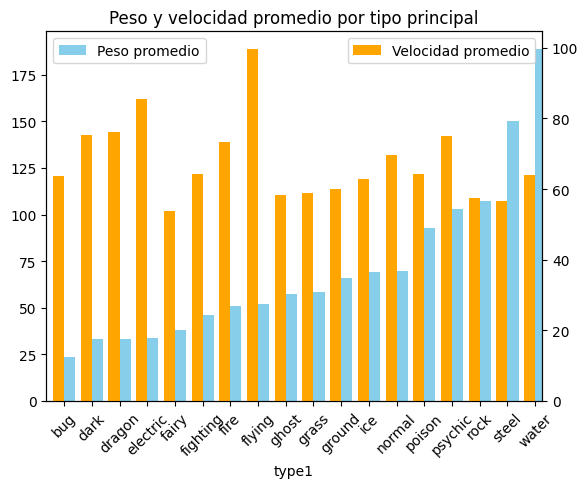

In [12]:
ax1 = plt.gca()
ax2 = ax1.twinx()

pesos.plot(kind='bar', ax=ax1, color='skyblue', position=0, width=0.4, label='Peso promedio')
velocidades.plot(kind='bar', ax=ax2, color='orange', position=1, width=0.4, label='Velocidad promedio')

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

ax1.set_title("Peso y velocidad promedio por tipo principal")

ax1.tick_params(axis='x', rotation=45)

plt.show()

A continuación vamos a representar cómo varía el ataque de los Pokemon teniendo en cuenta sus pesos. Para ello, primero debemos separar a los pokemon en grupos según su peso (basados en cuantiles) y calcula el ataque promedio para cada grupo.

1. `num_intervals` define en cuántos grupos se divide el peso.

2. [`np.quantile()`](https://numpy.org/doc/stable/reference/generated/numpy.quantile.html) calcula los límites que separan los datos en partes iguales.

3. Se crean etiquetas para cada grupo con el rango de peso correspondiente.

4. Se copia el DataFrame original para no modificarlo.

5. [`pd.cut()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.cut.html) asigna cada Pokémon a uno de los grupos según su peso.

6. Finalmente, con [`groupby()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html) y [`mean()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.groupby.GroupBy.mean.html) se calcula el ataque promedio de cada grupo.


In [13]:
num_intervals = 5

bins = np.quantile(df_pokemon["weight_kg"].dropna(), np.linspace(0, 1, num_intervals + 1))

labels = [f"{round(bins[i], 1)} - {round(bins[i+1], 1)}" for i in range(len(bins) - 1)]

copia_dataframe_pokemon = df_pokemon.copy()

copia_dataframe_pokemon["weight_category"] = pd.cut(
    copia_dataframe_pokemon["weight_kg"],
    bins=bins,
    labels=labels,
    include_lowest=True
)

ataque_peso = copia_dataframe_pokemon.groupby("weight_category")["attack"].mean()

/tmp/ipython-input-4189448188.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ataque_peso = copia_dataframe_pokemon.groupby("weight_category")["attack"].mean()


A continuación creamos el gráfico utilizando la variable calculada anteriormente.

1. [`plt.figure()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.figure.html) define el tamaño de la figura (ancho x alto).

2. [`plot(kind='bar')`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.plot.html) genera un gráfico de barras usando los datos de `ataque_peso`.  
   - Se especifica el color y el ancho de las barras.  
   - Se añade un título al gráfico.

3. [`plt.xticks(rotation=45)`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xticks.html) rota las etiquetas del eje X para mejorar la legibilidad.

4. [`plt.show()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.show.html) muestra el gráfico en pantalla.


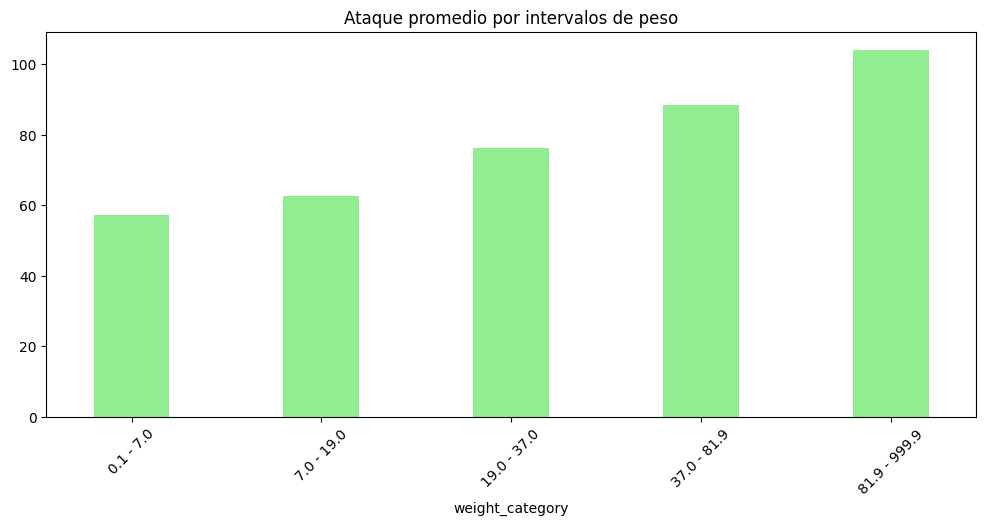

In [14]:
plt.figure(figsize=(12, 5))

ataque_peso.plot(kind='bar', color='lightgreen', width=0.4, title="Ataque promedio por intervalos de peso")
plt.xticks(rotation=45)

plt.show()

### Diagrama de cajas (boxplot)

Este código genera un gráfico de cajas (boxplot) para visualizar la distribución de la velocidad según el tipo principal de Pokémon.

1. [`df_pokemon.boxplot()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.boxplot.html) genera un boxplot:  
   - `column='speed'` indica que graficamos la columna velocidad.  
   - `by='type1'` agrupa los datos según el tipo principal.  
   - `grid=False` elimina las líneas de la cuadrícula para un gráfico más limpio.  
   - `figsize=(10,6)` define el tamaño de la figura (ancho x alto).

2. [`plt.title()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.title.html) agrega un título al gráfico.

3. [`plt.xticks(rotation=45)`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xticks.html) rota las etiquetas del eje X para facilitar la lectura.

4. [`plt.xlabel()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xlabel.html) y [`plt.ylabel()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.ylabel.html) ponen etiquetas a los ejes X e Y respectivamente.

5. [`plt.show()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.show.html) muestra el gráfico en pantalla.



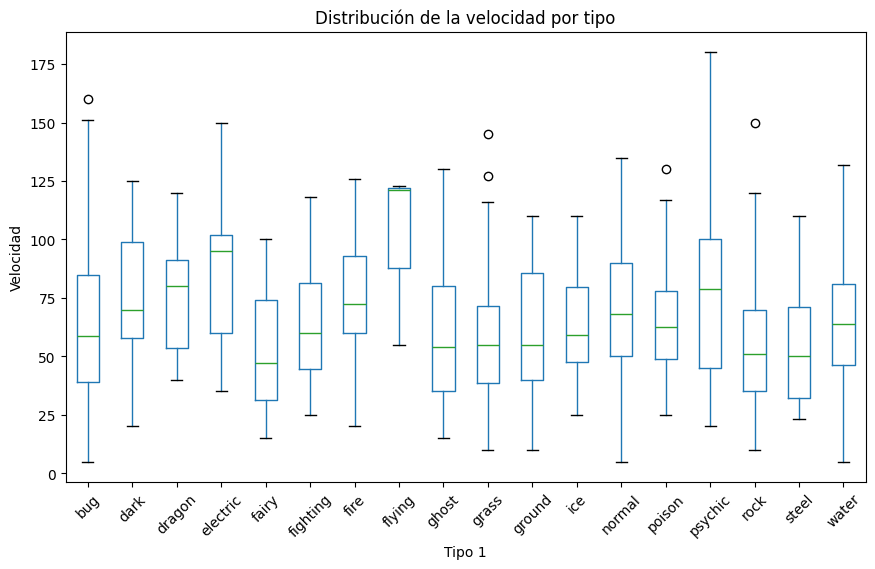

In [15]:
df_pokemon.boxplot(column='speed', by='type1', grid=False, figsize=(10,6))

plt.title('Distribución de la velocidad por tipo')
plt.suptitle('') # Sin esta línea pandas pone un título por defecto
plt.xticks(rotation=45)
plt.xlabel('Tipo 1')
plt.ylabel('Velocidad')

plt.show()

### Matriz de correlación

A continuación vamos a calcular una matriz de correlación para ver qué variables están relacionadas entre sí. Sin embargo, solo podemos calcularlo con las variables que contienen números (Descartamos, por ejemplo, el nombre o el tipo de los Pokémon).

1. [`apply(pd.to_numeric, errors='coerce')`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.apply.html) convierte todas las columnas a tipo numérico, transformando en NaN los valores que no se pueden convertir.

2. [`dropna(axis=1, how='all')`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html) elimina columnas que quedaron vacías (solo con NaN) después de la conversión.

3. [`corr()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html) calcula la matriz de correlación, que mide la relación lineal entre cada par de variables numéricas.

4. [`plt.figure()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.figure.html) define el tamaño del gráfico.

5. [`sns.heatmap()`](https://seaborn.pydata.org/generated/seaborn.heatmap.html) crea un mapa de calor para visualizar la matriz de correlación:  
   - `annot=False` no muestra los valores numéricos en cada celda.  
   - `cmap="PuOr"` usa una paleta de colores que va de tonos púrpura a naranja, destacando correlaciones positivas y negativas.  
   - `fmt=".2f"` formatea los números con 2 decimales (solo si `annot=True`).  
   - `linewidths=0.5` dibuja líneas divisorias entre las celdas.  
   - `vmin=-1, vmax=1` fija el rango del mapa de colores para abarcar todas las posibles correlaciones.

6. [`plt.title()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.title.html) agrega un título al gráfico.



Text(0.5, 1.0, 'Matriz de correlación')

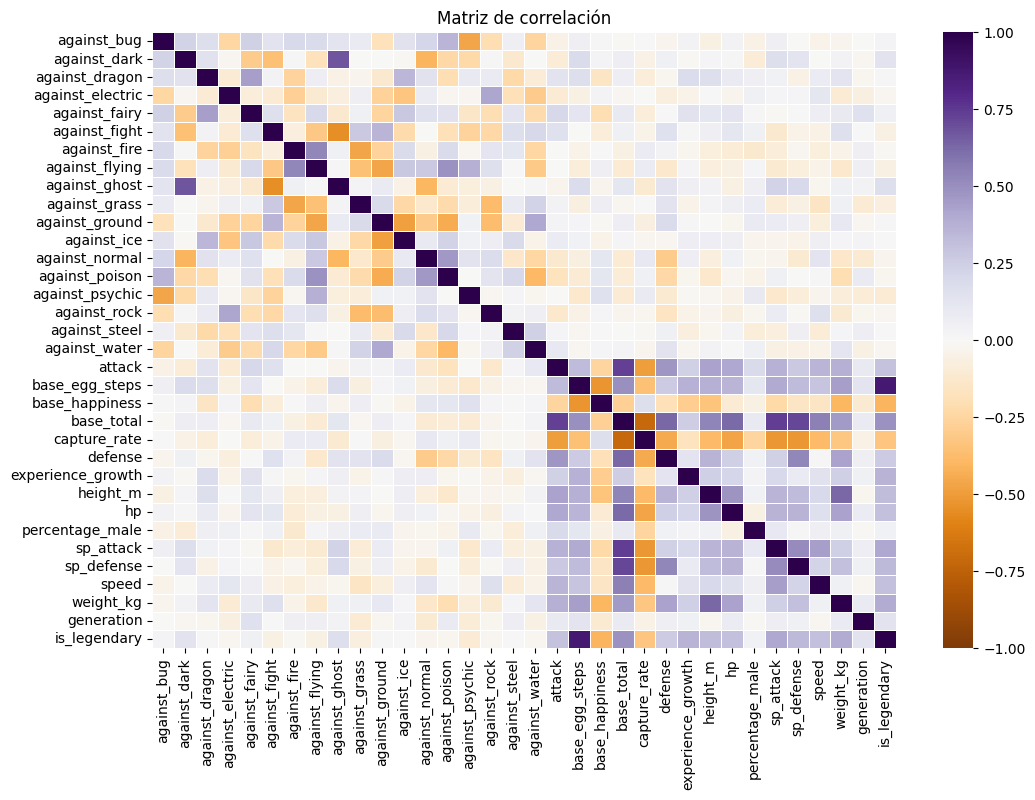

In [16]:
df_numeric = df_pokemon.apply(pd.to_numeric, errors='coerce')
df_numeric = df_numeric.dropna(axis=1, how='all')

correlation_matrix = df_numeric.corr()

plt.figure(figsize=(12, 8))

sns.heatmap(correlation_matrix,
            annot=False,
            cmap="PuOr",
            fmt=".2f",
            linewidths=0.5,
            vmin=-1, vmax=1)

plt.title("Matriz de correlación")

Text(0.5, 1.0, 'Matriz de correlación ')

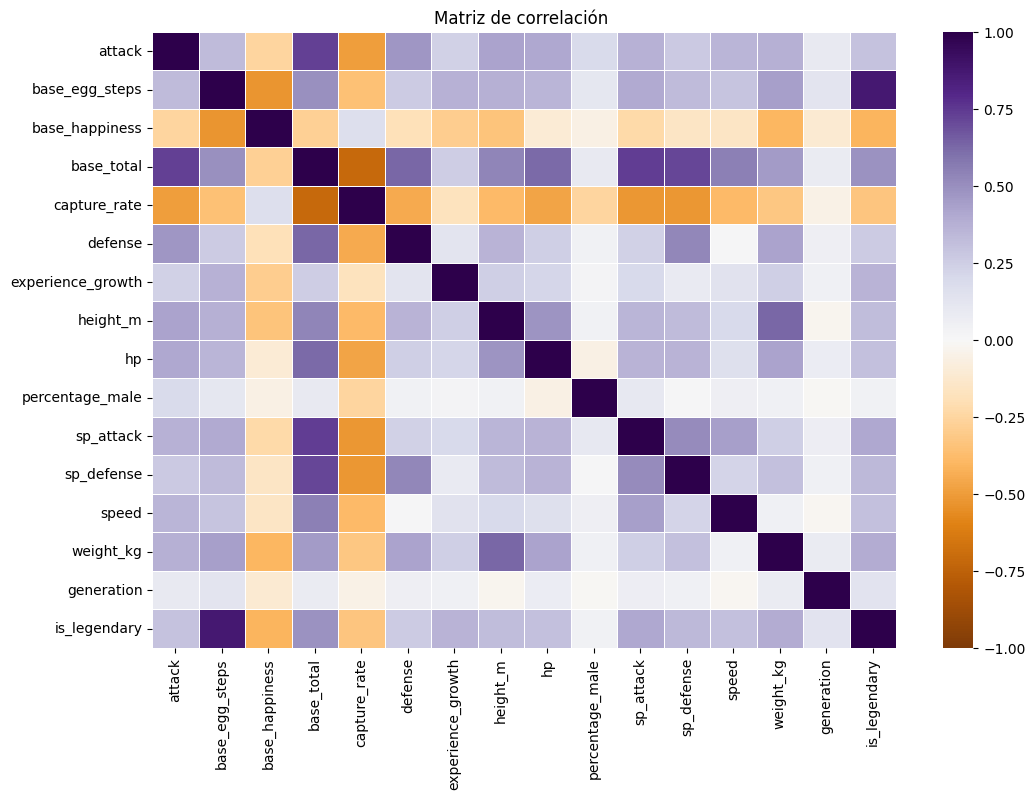

In [17]:
df_nuevo = df_numeric.iloc[:, 18:]

correlation_matrix = df_nuevo.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=False, cmap="PuOr", fmt=".2f", linewidths=0.5, vmin=-1, vmax=1)
plt.title("Matriz de correlación ")

A continuación vamos a comprobar cómo funcionan algunas características dependiendo de si el Pokémon es legendario o no. Si comparamos el gráfico de barras que obtenemos con la matriz de correlación anterior, podemos comprobar por qué algunas columnas como `capture_rate` o `base_happiness` obtienen correlación negativa, mientras que `base_total` y `speed` obtienen correlación positiva.

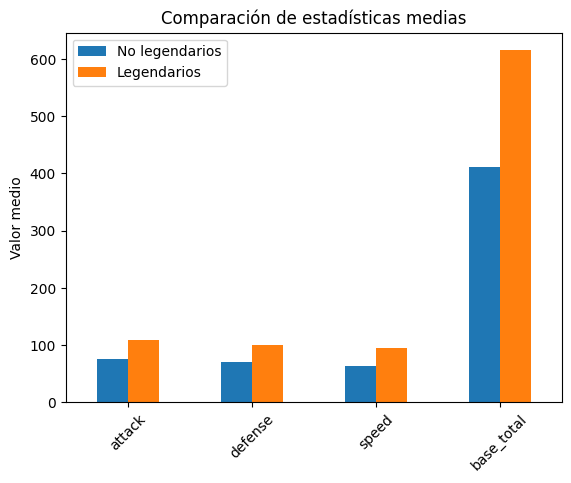

In [18]:
legendary_group = df_numeric.groupby('is_legendary')[['attack', 'defense', 'speed', 'base_total']].mean().T
legendary_group.plot(kind='bar')

plt.title('Comparación de estadísticas medias')

plt.ylabel('Valor medio')

plt.xticks(rotation=45)
plt.legend(['No legendarios', 'Legendarios'])
plt.show()

### Gráfico de radar

Por último, vamos a crear un gráfico de tipo radar que deberá mostrar 6 estadísticas del Pokémon que queramos. Para poder cambiar de Pokémon fácilmente, haremos el gráfico dentro de una función aparte.

1. Definimos las estadísticas que vamos a mostrar: `attack`, `defense`, `hp`, `sp_attack`, `sp_defense`, `speed`.

2. Filtramos el DataFrame para obtener las estadísticas del Pokémon cuyo nombre se pasa como argumento.

3. Se comprueba que el Pokémon exista en el DataFrame, y si no está se muestra un mensaje y se termina la ejecución.

4. Creamos un array de ángulos equidistantes para ubicar cada estadística alrededor del círculo del gráfico radar.

5. Para cerrar el gráfico, repetimos el primer valor y primer ángulo al final.

6. Creamos la figura con un eje polar usando [`plt.subplots()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html) con `subplot_kw=dict(polar=True)`.

7. Dibujamos la línea que une los puntos de las estadísticas con [`ax.plot()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.plot.html).

8. Rellenamos el área bajo la línea con [`ax.fill()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.fill.html) para mejorar la visualización.

9. Ponemos etiquetas a cada ángulo con [`ax.set_thetagrids()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_thetagrids.html), usando los nombres de las estadísticas.

10. Finalmente, se añade un título con [`plt.title()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.title.html) y se muestra el gráfico con [`plt.show()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.show.html).


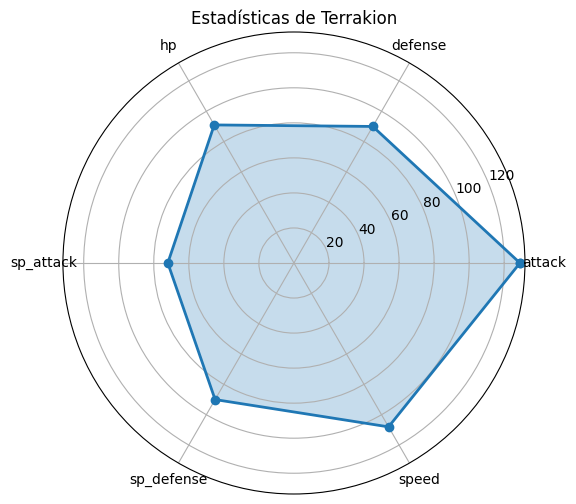

In [19]:

def plot_radar(pokemon_name):
    import pandas as pd
    import matplotlib.pyplot as plt
    import numpy as np

    stats = ['attack', 'defense', 'hp', 'sp_attack', 'sp_defense', 'speed']

    # Comprobación de si el pokémon existe
    pokemon_data = df_pokemon[df_pokemon['name'] == pokemon_name]
    if pokemon_data.empty:
        print(f'Pokémon "{pokemon_name}" no encontrado en el dataset.')
        return

    # Cogemos las estadísticas del pokémon como una lista
    row = pokemon_data[stats].iloc[0].to_list()

    # Calculamos los ángulos que van a componer el radar
    angles = pd.Series(np.linspace(0, 2 * np.pi, len(stats), endpoint=False))
    angles = pd.concat([angles, pd.Series([angles.iloc[0]])], axis=0, ignore_index=True)

    # Agregamos el primer valor al final de las estadísticas para que cuadre con los ángulos
    row.append(row[0])

    # Creamos el gráfico del radar
    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
    ax.plot(angles, row, 'o-', linewidth=2)
    ax.fill(angles, row, alpha=0.25)

    # Colocamos las etiquetas
    ax.set_thetagrids(angles[:-1] * (180 / np.pi), stats)

    plt.title(f'Estadísticas de {pokemon_name}')
    plt.show()

plot_radar('Terrakion')

### Ejercicio: Crear un gráfico de barras que compare las ventas de las diferentes marcas de motos

Para finalizar la parte de visualización, haremos un diagrama de barras que represente los datos del DataFrame de motos que se utilizó anteriormente en este curso. Concretamente, deberemos representar la cantidad de ventas anuales en millones por cada una de las marcas. Además, los valores deberán estar ordenados según la cantidad de ventas. Para esto último podemos utilizar la función [`sort_values()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.sort_values.html) y su parámetro `by=`

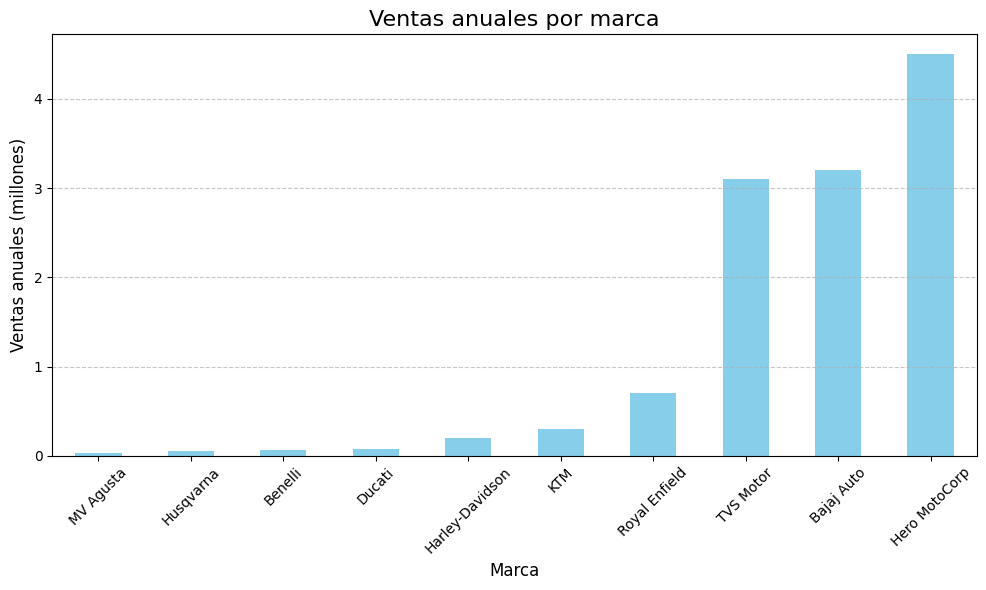

In [20]:
# Pintamos el gráfico

df_motos_nuevo = df_motos.sort_values(by="Ventas anuales (millones)")

df_motos_nuevo.plot(
    x="Marca",
    y="Ventas anuales (millones)",
    kind="bar",
    figsize=(10, 6),
    legend=False,
    color="skyblue"
)

# Damos formato al gráfico para que quede bonito
plt.title("Ventas anuales por marca", fontsize=16)
plt.xlabel("Marca", fontsize=12)
plt.ylabel("Ventas anuales (millones)", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()

# Mostramos el gráfico
plt.show()



